<a href="https://colab.research.google.com/github/redouane-b/Q_learning/blob/main/Graph_Q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Application de l'algorithme Q learning sur un graphe**

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import pandas as pd

## Graphe

### Création du graphe

In [2]:
T=nx.Graph()

T.add_edges_from([(0,1),(0,2),(1, 2), (1, 3),(3,4),(4,7),
(4,5),(5,6),(7,6),(2,6),(2,4),(3,8),(8,10),(7,10),(8,7),
(8,9),(9,10),(6,11),(7,11),(10,11),(10,12),(11,12)])

### Affichage du graphe

In [3]:
def afficher(T):
  pos = nx.spring_layout(T,seed=7)
    
  nx.draw_networkx_nodes(T, pos, node_size=200,nodelist=[0],node_color="c")
  nx.draw_networkx_nodes(T, pos, node_size=200,nodelist=[12],node_color="c")
  nx.draw_networkx_nodes(T, pos, node_size=200,nodelist=[4,6,10],node_color="r")
  nx.draw_networkx_nodes(T, pos, node_size=200,nodelist=[1,2,3,5,7,8,9,11],node_color='#79b6fb')
  nx.draw_networkx_labels(T, pos, font_size=10, font_family="sans-serif")
  nx.draw_networkx_edges(T, pos, edge_color="k",width=2)

  plt.show()

## Algorithme Q learning

### Création de la matrice récompense


In [4]:
R=np.array(np.zeros(shape=(13,13)))
for x in T[12]:
    R[x,12]=100
for i in [4,6,10]:
    for x in T[i]:
        R[x,i]=-100

In [5]:
pd.DataFrame(R)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,-100.0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,-100.0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,-100.0,0.0,-100.0,0.0,0.0,0.0,-100.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0


### Création de la Q table


In [6]:
Q=np.array(np.zeros(np.shape(R)))
Q-=100
for sommet in T.nodes:
    for x in T[sommet]:
        Q[sommet,x]=0
        Q[x,sommet]=0

In [7]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,0.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
2,0.0,0.0,-100.0,-100.0,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
3,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0
4,-100.0,-100.0,0.0,0.0,-100.0,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,0.0,-100.0,-100.0,-100.0,0.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,-100.0,0.0,-100.0,0.0,0.0,-100.0
8,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,0.0,-100.0,-100.0
9,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,-100.0,-100.0


### Choix de l'action entre exploration et exploitation

In [8]:
def action(debut,eps):
    if rd.random()<eps:
        action= np.random.choice(T[debut])
    else:
        action= np.argmax(Q[debut,])
    return action


### Mise à jour de la matrice Q

In [9]:
def updateQ(sommet1,sommet2,lr, gamma):
    maximum=np.argmax(Q[sommet2])
    Q[sommet1,sommet2]+=lr*(R[sommet1,sommet2]+gamma*maximum-Q[sommet1,sommet2])

### Boucle de l'apprentissage

In [10]:
def apprentissage(eps,lr,gamma):
    for i in range(10000):
        debut=rd.randint(0,12)
        prochain=action(debut,eps)
        updateQ(debut,prochain,lr,gamma)

### Temps de calcul

In [11]:
import time
début = time.time()
apprentissage(0.4,0.1,0.8)
fin = time.time()
print((fin - début),"s")

0.18871688842773438 s


### Matrice Q après execution

In [12]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-100.000000,2.400000,0.800000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.0
1,0.799993,-100.000000,0.799986,6.400000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.0
2,0.799948,2.400000,-100.000000,-100.000000,-94.391280,-100.000000,-91.182068,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.0
3,-100.000000,2.399892,-100.000000,-100.000000,-94.399368,-100.000000,-100.000000,-100.000000,5.600000,-100.000000,-100.000000,-100.000000,-100.0
4,-100.000000,-100.000000,0.799151,6.397431,-100.000000,4.799501,-100.000000,8.800000,-100.000000,-100.000000,-100.000000,-100.000000,-100.0
5,-100.000000,-100.000000,-100.000000,-100.000000,-94.399997,-100.000000,-91.200000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.0
6,-100.000000,-100.000000,0.799443,-100.000000,-100.000000,4.799107,-100.000000,8.799801,-100.000000,-100.000000,-100.000000,9.600000,-100.0
7,-100.000000,-100.000000,-100.000000,-100.000000,-94.145284,-100.000000,-91.067251,-100.000000,5.607184,-100.000000,-90.095524,9.600000,-100.0
8,-100.000000,-100.000000,-100.000000,6.396602,-100.000000,-100.000000,-100.000000,8.800000,-100.000000,6.400000,-90.268416,-100.000000,-100.0
9,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,5.600000,-100.000000,-90.399977,-100.000000,-100.0


### Application de la Q table pour trouver le chemin maximisant la récompense

In [13]:
def chemin(initial,final):
    chemin=[initial]
    prochain=np.argmax(Q[initial,])
    chemin.append(prochain)
    while prochain != final:
        prochain=np.argmax(Q[prochain,])
        chemin.append(prochain)
    return chemin

### Affichage du chemin optimale

In [14]:
chemin(0,12)

[0, 1, 3, 8, 7, 11, 12]

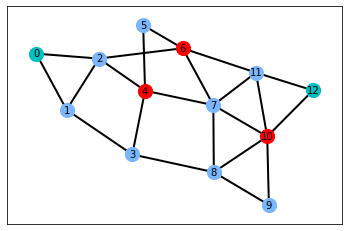

In [15]:
afficher(T)